In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')


In [32]:
df = pd.read_csv('BTC-USD.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-23,32985.757813,33360.976563,31493.160156,32067.642578,32067.642578,48354737975
1,2021-01-24,32064.376953,32944.007813,31106.685547,32289.378906,32289.378906,48643830599
2,2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,32366.392578,59897054838
3,2021-01-26,32358.613281,32794.550781,31030.265625,32569.849609,32569.849609,60255421470
4,2021-01-27,32564.029297,32564.029297,29367.138672,30432.546875,30432.546875,62576762015


In [33]:
df.shape

(1096, 7)

In [34]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1.096000e+03
mean,34991.650842,35769.312710,34142.188598,34993.077074,34993.077074,3.095933e+10
std,12609.617545,12971.070409,12179.894275,12604.432937,12604.432937,1.968249e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,5.331173e+09
25%,24738.201172,25228.042969,24302.009765,24719.875000,24719.875000,1.837778e+10
50%,32539.872071,33719.931640,31256.747071,32537.754883,32537.754883,2.739475e+10
75%,43798.200195,44430.390625,42785.268555,43792.700195,43792.700195,3.776437e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [35]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1096 non-null   object 
 1   Open       1096 non-null   float64
 2   High       1096 non-null   float64
 3   Low        1096 non-null   float64
 4   Close      1096 non-null   float64
 5   Adj Close  1096 non-null   float64
 6   Volume     1096 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.1+ KB


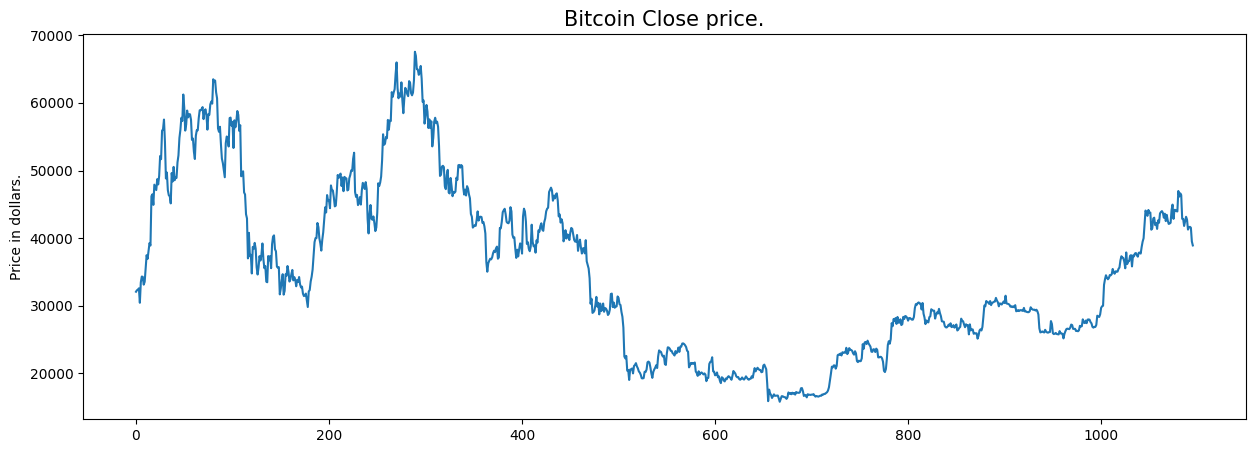

In [36]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


In [37]:
df[df['Close'] == df['Adj Close']].shape


(1096, 7)

In [38]:
df = df.drop(['Adj Close'], axis=1)


In [39]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

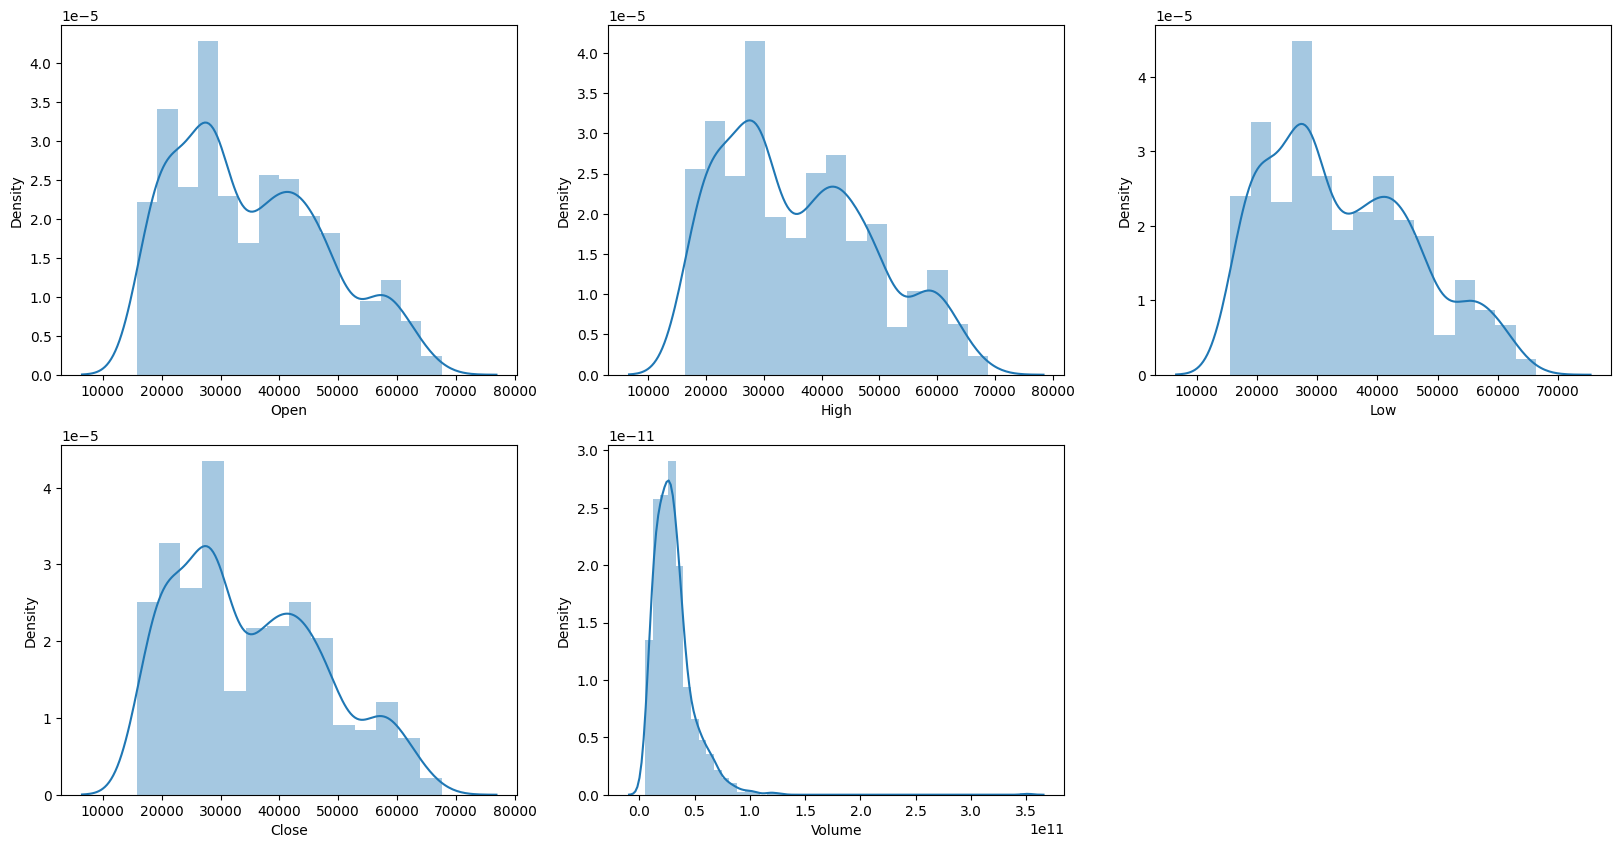

In [40]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(df[col])
plt.show()

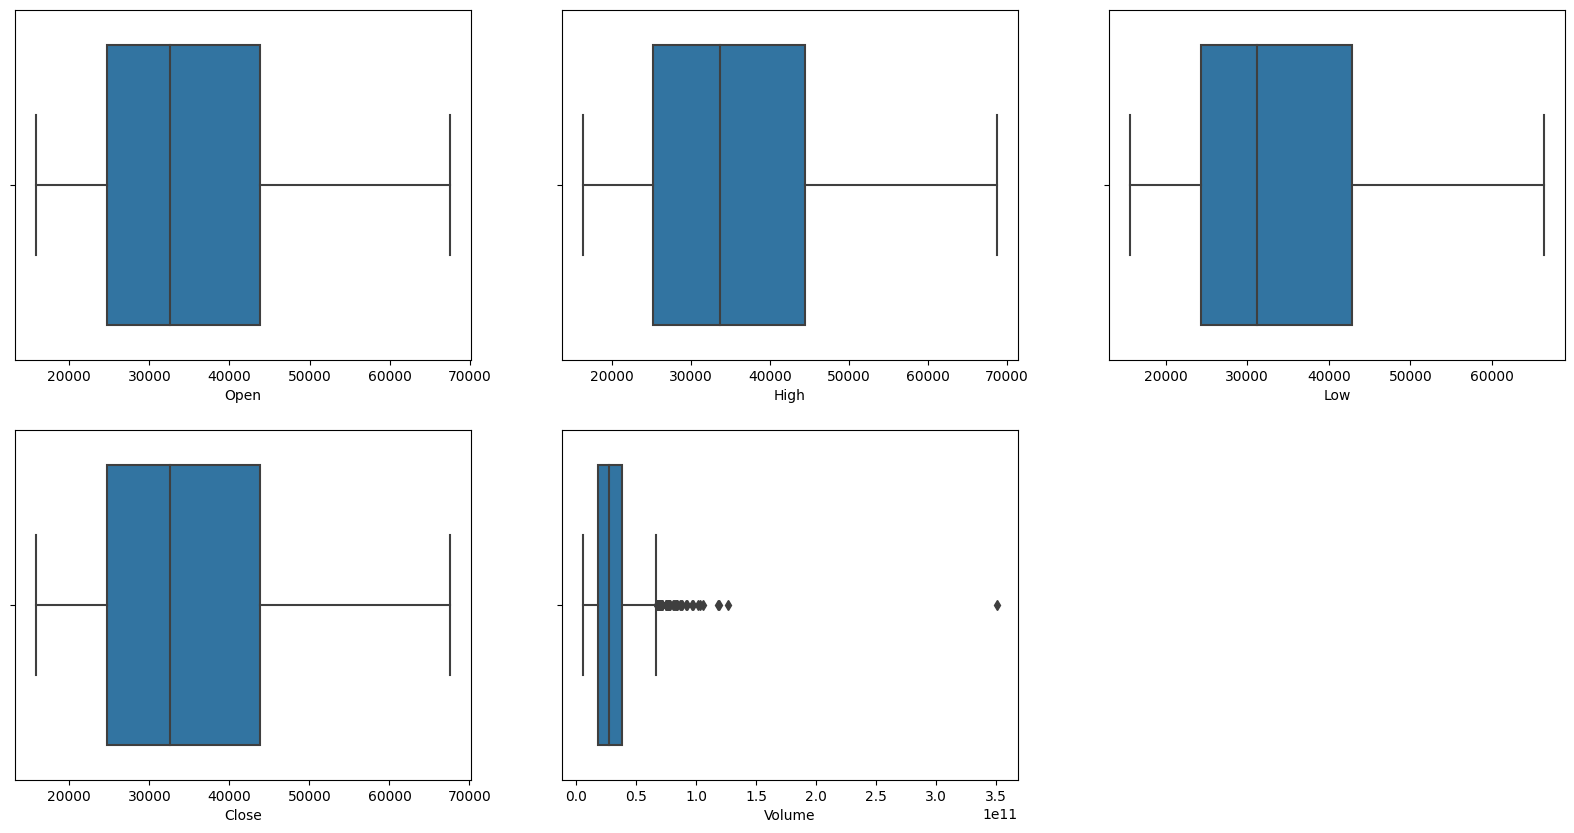

In [41]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.boxplot(df[col])
plt.show()

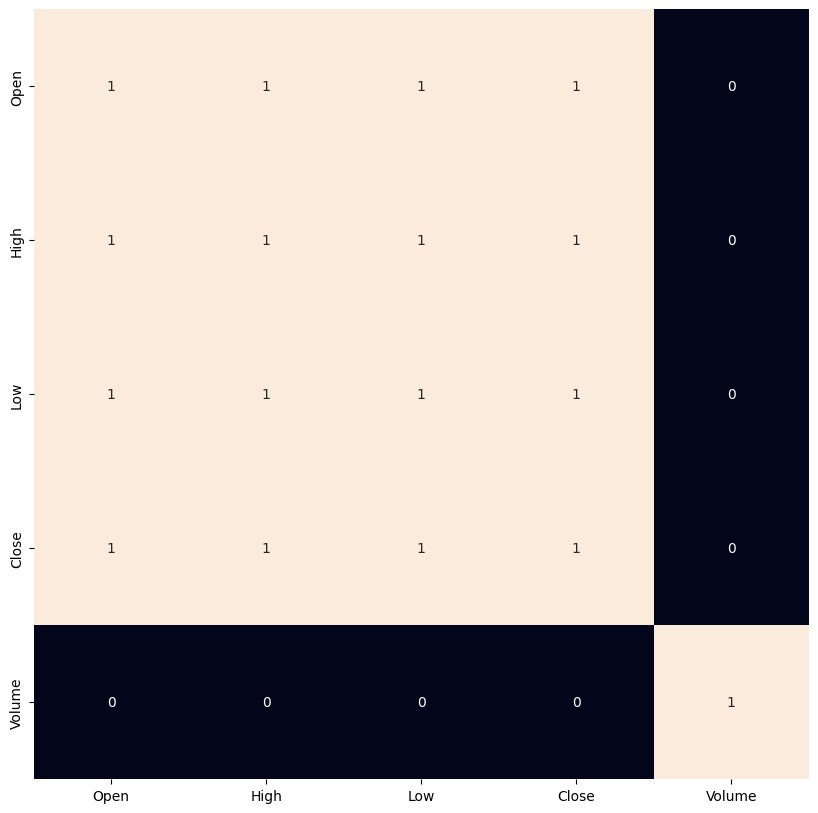

In [42]:
plt.figure(figsize=(10, 10))

# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

### 2. 4 technical indicators a. Moving Average(MA) b. Relative Strength Index (RSI) c. Bollinger Bands d. MACD (Moving Average Convergence Divergence 

In [43]:
# Function to calculate Moving Average (MA)
def calculate_ma(data, window):
    return data['Close'].rolling(window=window).mean()

# Function to calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Function to calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data['Close'].rolling(window=window).mean()
    rolling_std = data['Close'].rolling(window=window).std()

    upper_band = sma + 2 * rolling_std
    lower_band = sma - 2 * rolling_std
    
    return upper_band, lower_band

# Function to calculate Moving Average Convergence Divergence (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Close'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Close'].ewm(span=long_window, adjust=False).mean()
    
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    
    return macd, signal_line

# Add calculated indicators to the DataFrame
df['MA'] = calculate_ma(df, window=20)
df['RSI'] = calculate_rsi(df)
df['Upper_Band'], df['Lower_Band'] = calculate_bollinger_bands(df)
df['MACD'], df['Signal_Line'] = calculate_macd(df)

# Print the updated DataFrame
df.tail()

,Date,Open,High,Low,Close,Volume,MA,RSI,Upper_Band,Lower_Band,MACD,Signal_Line
1091,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,25752407154,43770.100977,40.218229,47185.057958,40355.143995,-204.501097,249.187241
1092,2024-01-20,41624.589844,41877.894531,41446.824219,41665.585938,11586690904,43740.120899,40.979022,47220.605317,40259.636480,-291.090042,141.131784
1093,2024-01-21,41671.488281,41855.367188,41497.007813,41545.785156,9344043642,43609.043555,40.745843,47216.911874,40001.175235,-365.169875,39.871452
1094,2024-01-22,41553.652344,41651.207031,39450.117188,39507.367188,31338708143,43336.513477,18.809080,47319.320938,39353.706015,-581.656992,-84.434236
1095,2024-01-23,39518.714844,40125.042969,38660.816406,38916.828125,31826454528,43139.946094,19.194513,47585.415881,38694.476306,-791.749364,-225.897262


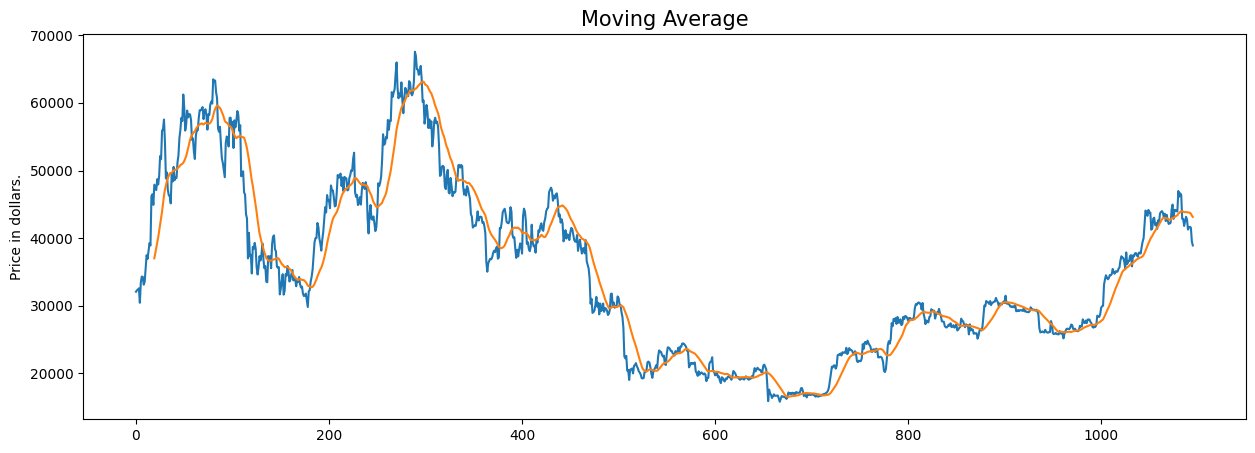

In [44]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.plot(df['MA'])
plt.title('Moving Average', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3], subplot_titles=('Price Chart', 'RSI'))

# Candlestick chart
candlestick = go.Candlestick(x=df['Date'],
                             open=df['Open'],
                             high=df['High'],
                             low=df['Low'],
                             close=df['Close'],
                             name='Candlesticks')

fig.add_trace(candlestick, row=1, col=1)

# Scatter plot for RSI
scatter = go.Scatter(x=df['Date'], y=df['RSI'], mode='markers', marker=dict(color='red'), name='RSI')

# Add indicator lines for min/max of RSI
min_rsi_line = go.Scatter(x=df['Date'], y=[30] * len(df), mode='lines', name='Oversold Threshold', line=dict(color='blue'))
max_rsi_line = go.Scatter(x=df['Date'], y=[70] * len(df), mode='lines', name='Overbought Threshold', line=dict(color='green'))

fig.add_trace(scatter, row=2, col=1)
fig.add_trace(min_rsi_line, row=2, col=1)
fig.add_trace(max_rsi_line, row=2, col=1)

# Customize layout
fig.update_layout(title_text='BTC-USD Price and RSI Analysis',
                  xaxis_rangeslider_visible=False)

# Display the chart directly in the Jupyter Notebook
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### 4. Calulating Correlation Matrix

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

correlation_matrix = df[['Close', 'MA', 'RSI', 'Upper_Band', 'Lower_Band', 'MACD', 'Signal_Line']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                Close        MA       RSI  Upper_Band  Lower_Band      MACD  \
Close        1.000000  0.968363  0.153852    0.957727    0.944744  0.336475   
MA           0.968363  1.000000 -0.054465    0.987211    0.977972  0.147527   
RSI          0.153852 -0.054465  1.000000   -0.043244   -0.067044  0.663239   
Upper_Band   0.957727  0.987211 -0.043244    1.000000    0.932189  0.135390   
Lower_Band   0.944744  0.977972 -0.067044    0.932189    1.000000  0.157699   
MACD         0.336475  0.147527  0.663239    0.135390    0.157699  1.000000   
Signal_Line  0.363443  0.225059  0.506987    0.205075    0.242498  0.960627   

             Signal_Line  
Close           0.363443  
MA              0.225059  
RSI             0.506987  
Upper_Band      0.205075  
Lower_Band      0.242498  
MACD            0.960627  
Signal_Line     1.000000  


### 5. Calculating the combined indicator using weighted average

In [47]:
weights = correlation_matrix['Close'].drop('Close')  # Use correlation with Close as weights
combined_indicator = df[['MA', 'RSI', 'Upper_Band', 'Lower_Band', 'MACD', 'Signal_Line']].mul(weights).sum(axis=1)

# Add combined indicator to the DataFrame
df['Combined_Indicator'] = combined_indicator


### 6. Methodology to predict bullish and bearish positions. We'll use Logistic Regression as a simple classification model
### Bullish: 1, Bearish: 0

In [48]:
df['Position'] = (df['Combined_Indicator'] > 0).astype(int)

### 7. Accuracy of prediction

In [49]:
print(df.head)

<bound method NDFrame.head of             Date          Open          High           Low         Close  \
0     2021-01-23  32985.757813  33360.976563  31493.160156  32067.642578   
1     2021-01-24  32064.376953  32944.007813  31106.685547  32289.378906   
2     2021-01-25  32285.798828  34802.742188  32087.787109  32366.392578   
3     2021-01-26  32358.613281  32794.550781  31030.265625  32569.849609   
4     2021-01-27  32564.029297  32564.029297  29367.138672  30432.546875   
...          ...           ...           ...           ...           ...   
1091  2024-01-19  41278.460938  42134.160156  40297.457031  41618.406250   
1092  2024-01-20  41624.589844  41877.894531  41446.824219  41665.585938   
1093  2024-01-21  41671.488281  41855.367188  41497.007813  41545.785156   
1094  2024-01-22  41553.652344  41651.207031  39450.117188  39507.367188   
1095  2024-01-23  39518.714844  40125.042969  38660.816406  38916.828125   

           Volume            MA        RSI    Upper_Band 

In [50]:
X = df[['MA', 'RSI', 'Upper_Band', 'Lower_Band', 'MACD', 'Signal_Line']]
y = df['Position']

# Fill missing values with column means
X = X.fillna(X.mean())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [51]:
# predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of prediction: {accuracy * 100:.2f}%")


Accuracy of prediction: 100.00%


In [52]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       220

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

